Rerun

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import tricontour_animation as ta
import h5py
import numpy as np
import pylab
import matplotlib.pyplot as plt
import csv


In [ ]:
ta.main_rho("output")

In [ ]:
ta.main_p("output")

In [ ]:
ta.main_vel("output")

In [4]:
ta.main_s("output")

100%|███████████████████████████████████████████| 14/14 [00:00<00:00, 20.55it/s]


In [4]:
ta.main_verts("output")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:02<00:00, 34.64it/s]


In [ ]:
ta.main_tracer_depth("depth")

In [ ]:
ta.main_tracer("38")

In [ ]:
ta.main_tracer("35")

In [ ]:
ta.main_tracer("33")

In [ ]:
ta.main_tracer("35_94")

In [ ]:
# plot with cell path
fig = plt.figure()
ax = plt.subplot(111)

N = 151;
lst = np.zeros((N,2))
for i in range(N):
    with h5py.File("runs_data/big_runs/first_round/-10_0p05_0p0025_0p01/snapshot_{:n}.h5".format(i),
                   'r') as f:
        stkr = f['stickers']['38'];
        idx = np.where(stkr)
        x = np.array(f['geometry']['x_coordinate'])[idx];
        y = np.array(f['geometry']['y_coordinate'])[idx];
        lst[i,0], lst[i,1] = x,y
        
    

with h5py.File("runs_data/big_runs/first_round/-10_0p05_0p0025_0p01/snapshot_0.h5",
               'r') as f:
    time = np.array(f['time'])
    x = np.array(f['geometry']['x_coordinate']);
    y = np.array(f['geometry']['y_coordinate']);
    rho = np.array(f['hydrodynamic']['density']);
    
ax.tricontourf(x,y,np.log10(rho));
ax.plot(lst[:,0],lst[:,1])
plt.show()

In [ ]:
N = 95
arr = np.zeros(N)
r = np.linspace(0,N, N)
for i in range(N):
    with h5py.File('output/snapshot_{:n}.h5'.format(i),
                   'r') as f:
        #print(f['stickers'].keys())
        tracer = np.array(f['stickers']['33'])
        print(np.where(tracer))
        p = np.array(f['hydrodynamic']['pressure'])[idx];
        rho = np.array(f['hydrodynamic']['density']);
        x = np.array(f['geometry']['x_coordinate']);
        y = np.array(f['geometry']['y_coordinate']);
        #print(idx, p)
        arr[i] = p

plt.plot(r,arr)
plt.show()
    
    

In [ ]:
lims = 4
with h5py.File("initial.h5",'r') as f1:
    with h5py.File("output/snapshot_48.h5",'r') as f2:
        #p = np.array(f['hydrodynamic']['pressure']);
        rho = np.array(f2['hydrodynamic']['density']);
        x1 = np.array(f1['geometry']['x_coordinate']);
        y1 = np.array(f1['geometry']['y_coordinate']);
        x2 = np.array(f2['geometry']['x_coordinate']);
        y2 = np.array(f2['geometry']['y_coordinate']);
        t = np.array(f2['time'])[0]
        # plt.plot(x1,x2)
        # plt.show()
        # plt.plot(y1,y2)
        print(t)
        # plt.tricontourf(x1,y1,np.log(rho))
        # plt.title("t = {}".format(t))
        # plt.xlim(0,lims)
        # plt.ylim(-lims,lims)
        # plt.show()

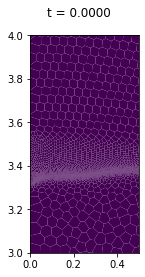

In [6]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

with h5py.File('output/snapshot_13.h5','r') as f:
            vert_x_raw = np.array(f['geometry']['x_vertices'])
            vert_y_raw = np.array(f['geometry']['y_vertices'])
            vert_n_raw = np.array(f['geometry']['n_vertices'])
            vert_idx_list = np.concatenate(([0],np.cumsum(vert_n_raw))).astype(int)

            polygon_list = [Polygon(
                    np.vstack((vert_x_raw[low_idx:high_idx],
                                  vert_y_raw[low_idx:high_idx])).T)
                            for low_idx, high_idx
                            in zip(vert_idx_list[:-1], vert_idx_list[1:])]

            patch_collection = PatchCollection(polygon_list, linestyle='-')
            z_list = np.clip(np.log10(f['hydrodynamic']['density']), -2, 3)
            patch_collection.set_array(z_list)
            #patch_collection.set_array(np.log10(f['hydrodynamic']['density']))
            #patch_collection.set_array(f['hydrodynamic']['density'])
            fig, ax = pylab.subplots()
            ax.add_collection(patch_collection)
            pylab.suptitle('t = %.4f' % np.array(f['time'])[0])
            pylab.axis('scaled')
            pylab.xlim((0,0.5))
            pylab.ylim((3,4))

In [ ]:
for i in range(51):
    with h5py.File("output/snapshot_{:n}.h5".format(i)
                   ,'r') as f:
                gamma = 4/3
                p = np.array(f['hydrodynamic']['pressure'])
                rho = np.array(f['hydrodynamic']['density'])
                x = np.array(f['geometry']['x_coordinate'])
                y = np.array(f['geometry']['y_coordinate'])
                c_s = np.sqrt(gamma*p/rho);
                c_max_ind = np.argmax(c_s)
                #print(c_max_ind, c_s[c_max_ind])
    #             x = np.concatenate((-x, x))
    #             y = np.concatenate((-y, y))
    #             rho = np.concatenate((rho, rho))
                T = p/rho
                bs = rho**2*np.sqrt(T)
                R = x**2 + y**2
                Rx = x[np.where((R >= 0.99) & (R <= 1.01))]
                Ry = y[np.where((R >= 0.99) & (R <= 1.01))]
                clr = "black"
                fig = plt.figure()
                ax = plt.subplot(111)

                circle = plt.Circle((0,0), 1, color="w", fill=False)


                # stkr1 = f['stickers']['38']
                # stkr2 = f['stickers']['35']
                #stkr3 = f['stickers']['33']
                # stkr4 = f['stickers']['35_94']
                # idx1 = np.where(stkr1)
                # idx2 = np.where(stkr2)
                #idx3 = np.where(stkr3)
    #             idx4 = np.where(stkr4)

    #             x1, y1 = x[idx1], y[idx1]
    #             x2, y2 = x[idx2], y[idx2]
                #x3, y3 = x[idx3], y[idx3]
                # x4, y4 = x[idx4], y[idx4]
                # x_arr = [x1,x2,x3,x4]
                # y_arr = [y1,y2,y3,y4]


                #ax.plot(x3, y3, 'w.', markersize=5)

                sp = ax.tricontourf(x, y, np.log(rho),
                                  50, cmap='plasma')
                ax.tricontourf(-x, y, np.log(rho),
                               50, cmap='plasma')
                #ax.add_patch(circle)

                ax.set_title('Density Distribution \n t = %1.4f' % np.array(f['time'])[0], color=clr)
                cb = fig.colorbar(sp)
                cb.set_label('log(Density)', color=clr)
                cb.ax.yaxis.set_tick_params(color=clr, labelcolor=clr)
                ax.axis('scaled')
                ax.set_xlabel("x", color=clr)
                ax.set_ylabel("y", color=clr)
                ax.spines['bottom'].set_color(clr)
                ax.tick_params(axis='x', colors=clr)
                ax.spines['left'].set_color(clr)
                ax.tick_params(axis='y', colors=clr)
                lim=3
                ax.set_xlim((-lim,lim))
                ax.set_ylim((-lim,lim))
                pylab.savefig("images/img{:n}.png".format(i))

In [ ]:
lim = 1

def close_0(val, tol):
    return ((val < -tol) | (val > tol))
    

with h5py.File("initial.h5",'r') as f1:
    with h5py.File("checkpoint.h5",'r') as f2:
        p1 = np.array(f1['hydrodynamic']['pressure'])
        p2 = np.array(f2['hydrodynamic']['pressure'])
        p = (p1 - p2)
        #idx = np.where(close_0(p, 1e-5))[0]
        idx = np.where(p != 0)[0]
        n = np.linspace(0,len(p),len(p))
        print(len(p), len(idx))
        p_idx = p[idx]
        fig = plt.figure()
        ax1 = plt.subplot(121)
        ax2 = plt.subplot(122)
        x = np.array(f1['geometry']['x_coordinate'])
        y = np.array(f1['geometry']['y_coordinate'])
        ax1.plot(n,p, 'r.', markersize = 1)
        mx = np.argmax(p)
        max_x, max_y = x[mx],y[mx]
        print(min(p), max(p))
        print(max_x, max_y)
        #plt.show()
        
        
        sp = ax2.tricontourf(x, y, p1,
                       140, cmap='plasma')
        fig.colorbar(sp)
        ax2.set_xlim(0,lim)
        ax2.set_ylim(-lim,lim)


In [ ]:
with h5py.File("output/snapshot_{:n}.h5".format(i)
                   ,'r') as f:
                gamma = 4/3
                p = np.array(f['hydrodynamic']['pressure'])
                rho = np.array(f['hydrodynamic']['density'])
                x = np.array(f['geometry']['x_coordinate'])
                y = np.array(f['geometry']['y_coordinate'])
                c_s = np.sqrt(gamma*p/rho);
                c_max_ind = np.argmax(c_s)
                #print(c_max_ind, c_s[c_max_ind])
    #             x = np.concatenate((-x, x))
    #             y = np.concatenate((-y, y))
    #             rho = np.concatenate((rho, rho))
                T = p/rho
                bs = rho**2*np.sqrt(T)
                R = x**2 + y**2
                Rx = x[np.where((R >= 0.99) & (R <= 1.01))]
                Ry = y[np.where((R >= 0.99) & (R <= 1.01))]
                clr = "black"
                fig = plt.figure()
                ax = plt.subplot(111)

                circle = plt.Circle((0,0), 1, color="w", fill=False)


                # stkr1 = f['stickers']['38']
                # stkr2 = f['stickers']['35']
                #stkr3 = f['stickers']['33']
                # stkr4 = f['stickers']['35_94']
                # idx1 = np.where(stkr1)
                # idx2 = np.where(stkr2)
                #idx3 = np.where(stkr3)
    #             idx4 = np.where(stkr4)

    #             x1, y1 = x[idx1], y[idx1]
    #             x2, y2 = x[idx2], y[idx2]
                #x3, y3 = x[idx3], y[idx3]
                # x4, y4 = x[idx4], y[idx4]
                # x_arr = [x1,x2,x3,x4]
                # y_arr = [y1,y2,y3,y4]


                #ax.plot(x3, y3, 'w.', markersize=5)

                sp = ax.tricontourf(x, y, np.log(rho),
                                  50, cmap='plasma')
                ax.tricontourf(-x, y, np.log(rho),
                               50, cmap='plasma')
                #ax.add_patch(circle)

                ax.set_title('Density Distribution \n t = %1.4f' % np.array(f['time'])[0], color=clr)
                cb = fig.colorbar(sp)
                cb.set_label('log(Density)', color=clr)
                cb.ax.yaxis.set_tick_params(color=clr, labelcolor=clr)
                ax.axis('scaled')
                ax.set_xlabel("x", color=clr)
                ax.set_ylabel("y", color=clr)
                ax.spines['bottom'].set_color(clr)
                ax.tick_params(axis='x', colors=clr)
                ax.spines['left'].set_color(clr)
                ax.tick_params(axis='y', colors=clr)
                lim=3
                ax.set_xlim((-lim,lim))
                ax.set_ylim((-lim,lim))
                pylab.savefig("images/img{:n}.png".format(i))

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(1, 1)
fg = gs.subplots()


with h5py.File("output/snapshot_0.h5", 'r') as f:
    x = np.array(f['geometry']['x_coordinate']);
    y = np.array(f['geometry']['y_coordinate']);
    rho = np.array(f['hydrodynamic']['density'])
    fg.scatter(x,y, s=1)
    r_ind = np.where(np.sqrt(x**2 + y**2) < 1)
    int_cells = np.size(x[r_ind])
    cells = np.size(x)
    res = np.sqrt(int_cells/(np.pi/2))
    print("""There are {:n} cells, {:n} interior to the stellar radius and
    the effective resolution of the stellar radius is {:n}""".format(cells, int_cells, res))
    # rho_s = rho[np.where(rho>1.1e-15)]
    rho_s = rho[r_ind]
    rho_min = np.amin(rho_s)
    typ_rho = (np.pi/(2*int_cells))**(3/2)
    print("Min rho={:e}, typical min rho={:e}".format(rho_min, typ_rho))
    fg.set_xlim(0,0.1)
    fg.set_ylim(-1,1)
    plt.show()
    

In [ ]:
data = np.loadtxt("tracked_cell_33_97.txt", delimiter=',');
data = np.transpose(data);
t = data[1]
x = data[2]
y = data[3]
print(len(x), y)
plt.scatter(x,y, c=t, cmap='viridis');
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0,4);
plt.ylim(0,4);
plt.colorbar()
plt.show()
            

In [ ]:
def g_arr(r, R=1, dr_c=0.05, dr_s=0.005, alpha=0.05, b=1):
    g1 = dr_s + (dr_c - dr_s)*(1-r/R)**b;
    #g2 = dr_s + (2*alpha*R - dr_s)*(r/R - 1);
    g = r*0;
    #g[r<R] = g1[r<R];
    #g[r>=R] = g2[r>R];
    gmax = alpha*r/R;
    res = g1;
    #res[r>R] = np.minimum(res[r>R], gmax[r>R]);
    return res



In [ ]:
rho = np.loadtxt("polytrope_rho.txt")
r = np.loadtxt("polytrope_r.txt")
m = 4*np.pi*r**2*rho
m_int= np.cumsum(m)
E_in = 1
v_s = 0.794*np.sqrt(E_in/m)*(m/(rho*r**3))**0.19


dr = g_arr(r, 1, 0.025, 0.002, 0.01, 1);

dt = 0.3*dr/v_s
csEXT = dr/dt
print(np.nanmin(csEXT))

In [ ]:
print(dt_min)
plt.scatter(r, dt)
plt.show()

In [ ]:
import re

In [ ]:

fpath1 = "runs_data/big_runs/first_round/-10_0p05_0p0025_0p01/snapshot_96"
fpath2 = "runs_data/big_runs/f_27_f_04/-10_0p05_0p0025_0p01/snapshot_78"
fpath3 = "output/snapshot_20"

lst = re.findall(r'_(\d+)', fpath3)[-1]
#brk = int(re.search(r'_(\d+)\.',fpath3).group(1))
res = int(re.findall(r'_(\d+)',fpath3)[-1])
print(lst, type(lst), res, type(res))